In [4]:

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum().sum())  



First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in the dataset:
0


C:\Users\neeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


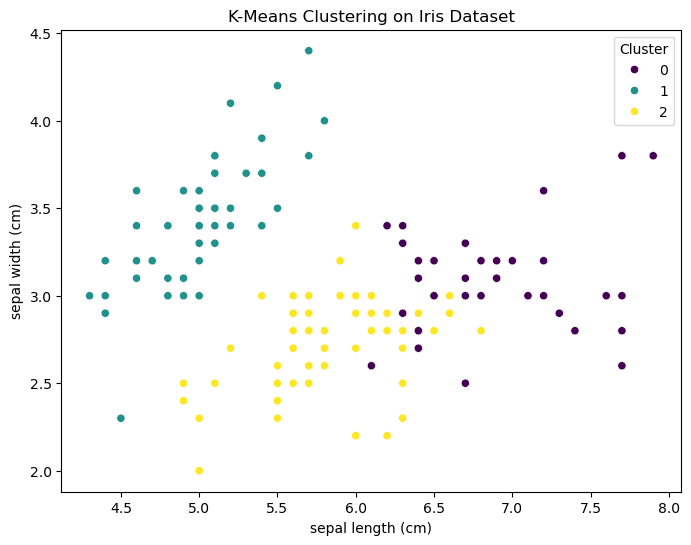

In [6]:
from sklearn.cluster import KMeans

#  Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.legend(title="Cluster")
plt.show()


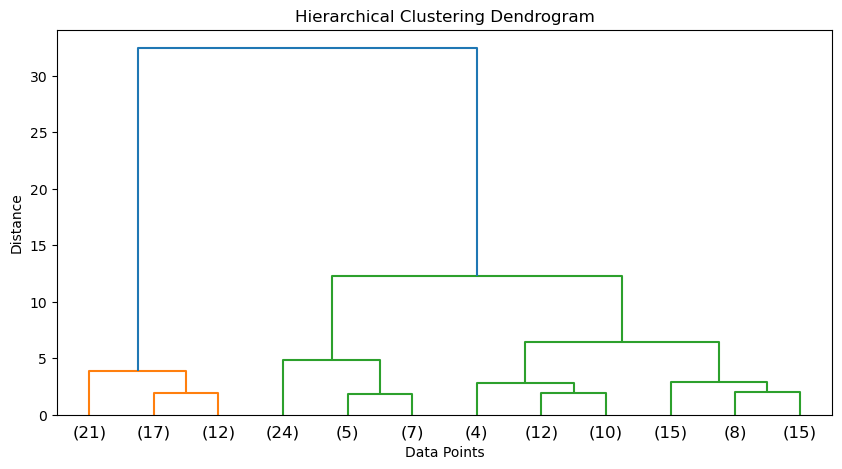

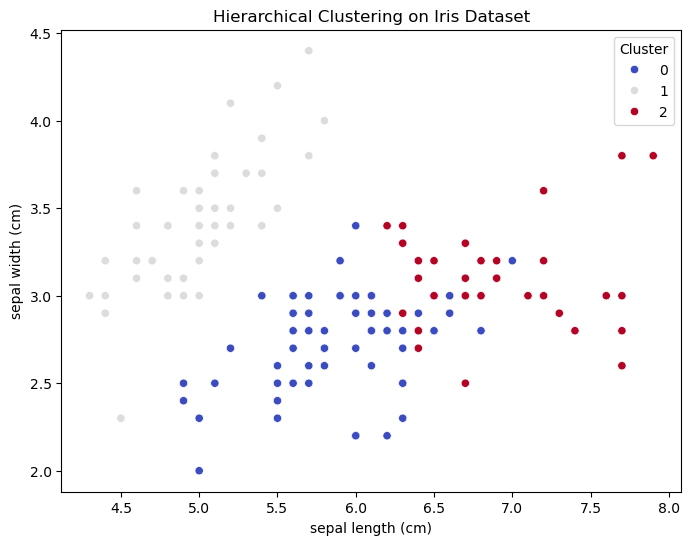

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Plot the Dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df.drop(columns=['KMeans_Cluster']), method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df.drop(columns=['KMeans_Cluster']))

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering on Iris Dataset')
plt.legend(title="Cluster")
plt.show()
